In [45]:
import numpy as np

def yangsheng_noNoise(x,T=0.1):
    a = (x[5]-2*x[4]+2*x[3]-2*x[2]+2*x[1]-2*x[0])/3/T**2
    return a

def zhucha_noNoise(x3 = 0.09, x6 = 0.36, T=0.1):
    a = (x6-2*x3)/9/T**2
    return a

def zhucha(x3 = 0.09, x6 = 0.36, T = 0.1, sigma = 0.001, simu_number = 100):
    x3_measure = x3 + np.random.normal(0,sigma,simu_number)
    x6_measure = x6 + np.random.normal(0,sigma,simu_number)
    a_est = np.mean((x6_measure-2*x3_measure)/9/T**2)
    return a_est

def yangsheng(x,T=0.1,sigma = 0.001,simu_number = 100):
    a_est = []
    for i in range(simu_number):
        x_measure = x + np.random.normal(0,sigma,len(x))
        a_est.append((x_measure[5]-2*x_measure[4]+2*x_measure[3]-2*x_measure[2]+2*x_measure[1]-2*x_measure[0])/3/T**2)
    return np.mean(a_est)

x = [2,6,12,20,30,42]

# print(yangsheng_noNoise(x,T=1))
# print(zhucha_noNoise(x[2],x[5],T=1))

print('杨胜法：',yangsheng(x,T=1,simu_number = 1))
print('逐差法：',zhucha(x[2],x[5],T=1,simu_number = 1))

#print(zhucha())
#print(zhucha(sigma = 0.01))
#print(zhucha(x3 = 9, x6=18))

杨胜法： 1.9986119984739121
逐差法： 2.000306998667574


In [47]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


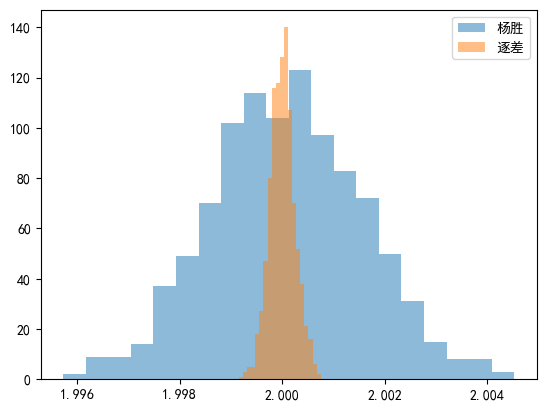

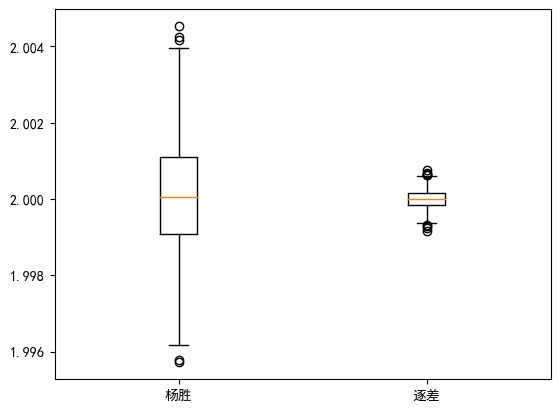

Mean of Data 1: 2.0000896047896513
Mean of Data 2: 2.000006532901844
Std of Data 1: 0.0014831851855550656
Std of Data 2: 0.00024202894143766438
T-test statistic: 1.7471686318491566, p-value: 0.08076172743488881


NameError: name 'pd' is not defined

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 假设我们有两组数据
data1 = []  # 杨胜
data2 = []  # 逐差
for i in range(1000):
    data1.append(yangsheng(x,T=1,simu_number = 1))
    data2.append(zhucha(x[2],x[5],T=1,simu_number = 1))
    
    
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是一种常用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
  

# 绘制直方图
plt.hist(data1, bins=20, alpha=0.5, label='杨胜')
plt.hist(data2, bins=20, alpha=0.5, label='逐差')
plt.legend()
plt.show()

# 绘制箱线图
plt.boxplot([data1, data2], labels=['杨胜', '逐差'])
plt.show()

# 计算并打印均值和标准差
print(f"Mean of Data 1: {np.mean(data1)}")
print(f"Mean of Data 2: {np.mean(data2)}")
print(f"Std of Data 1: {np.std(data1)}")
print(f"Std of Data 2: {np.std(data2)}")

# 进行t检验
t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"T-test statistic: {t_stat}, p-value: {p_value}")

# 如果数据是分类数据，可以使用卡方检验
# 假设我们有两组分类数据
categories1 = np.random.choice(['A', 'B', 'C'], 100)
categories2 = np.random.choice(['A', 'B', 'C'], 100)

# 进行卡方检验
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(categories1, categories2))
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

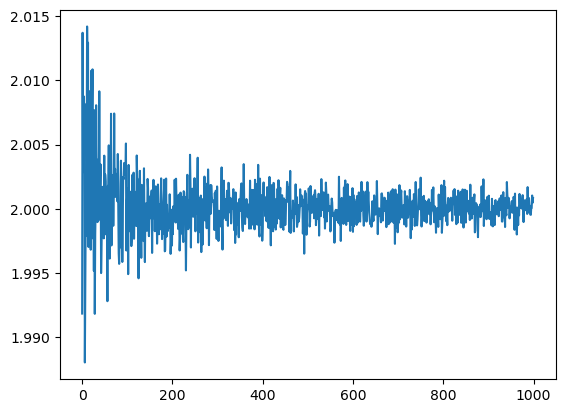

In [18]:
# 展示仿真次数对估计值的影响

import matplotlib.pyplot as plt

simu_number_max = 1000

a_est_seq = []

for i in range(simu_number_max):
    a_est_seq.append(zhucha(simu_number = i+1))
    
plt.plot(a_est_seq)


    


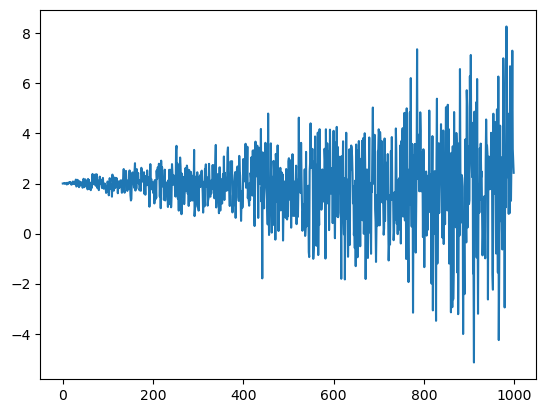

In [21]:
# 展示噪声标准差对估计的影响

import matplotlib.pyplot as plt

sigma_seq = np.linspace(0,1,1000)

a_est_seq = []

for s in sigma_seq:
    a_est_seq.append(zhucha(sigma = s))
    
plt.plot(a_est_seq)